In [1]:
import pandas as pd 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
otu_phenotype = pd.read_csv("otu_phenotype.csv")

In [3]:
otu_phenotype

,SampleID,OTU_3,OTU_4,OTU_7,OTU_24,OTU_1,OTU_30,OTU_580,OTU_36,OTU_68,...,OTU_509,OTU_240,OTU_311,OTU_1141,OTU_173,OTU_202,OTU_227,OTU_238,OTU_298,Phenotype
0,81.AVd_108,2430,1998,3198,1335,465,466,215,430,179,...,1,0,0,0,0,0,0,0,0,TF
1,83.AVd_109,2515,1809,3233,1212,437,600,136,193,113,...,0,0,0,0,0,0,0,0,0,TF
2,85.AVd_110,2671,1802,3397,1320,690,655,187,234,149,...,0,0,0,0,0,0,0,0,0,TF
3,86.AVd_148,0,147,1,172,192,2,0,211,31,...,15,0,0,0,0,0,0,17,0,T
4,87.AVd_150,9,110,0,144,687,4,4,506,13,...,9,0,0,0,0,0,0,71,0,T
5,88.AVd_154,1,3,1,149,1,15,0,282,11,...,0,0,0,0,0,0,0,0,0,TF
6,89.AVd_166,5,12,4,100,845,85,1,161,17,...,0,0,0,0,0,0,0,0,0,T
7,90.AVd_167,3,0,4,118,847,57,0,96,17,...,0,0,0,0,0,0,0,0,0,T
8,92.AVd_170,1,0,0,456,586,201,0,357,27,...,0,0,0,0,0,0,0,0,0,TF
9,93.AVd_292,1183,539,0,103,2092,107,0,232,58,...,0,0,0,0,0,0,0,0,0,T


In [4]:
X_otu = otu_phenotype.drop(["SampleID","Phenotype"], axis=1)

In [5]:
X_otu

,OTU_3,OTU_4,OTU_7,OTU_24,OTU_1,OTU_30,OTU_580,OTU_36,OTU_68,OTU_88,...,OTU_618,OTU_509,OTU_240,OTU_311,OTU_1141,OTU_173,OTU_202,OTU_227,OTU_238,OTU_298
0,2430,1998,3198,1335,465,466,215,430,179,99,...,0,1,0,0,0,0,0,0,0,0
1,2515,1809,3233,1212,437,600,136,193,113,81,...,0,0,0,0,0,0,0,0,0,0
2,2671,1802,3397,1320,690,655,187,234,149,98,...,0,0,0,0,0,0,0,0,0,0
3,0,147,1,172,192,2,0,211,31,10,...,0,15,0,0,0,0,0,0,17,0
4,9,110,0,144,687,4,4,506,13,20,...,0,9,0,0,0,0,0,0,71,0
5,1,3,1,149,1,15,0,282,11,0,...,0,0,0,0,0,0,0,0,0,0
6,5,12,4,100,845,85,1,161,17,31,...,0,0,0,0,0,0,0,0,0,0
7,3,0,4,118,847,57,0,96,17,23,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,456,586,201,0,357,27,30,...,0,0,0,0,0,0,0,0,0,0
9,1183,539,0,103,2092,107,0,232,58,17,...,0,0,0,0,0,0,0,0,0,0


In [6]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_otu)

AttributeError: 'function' object has no attribute 'get_xaxis'

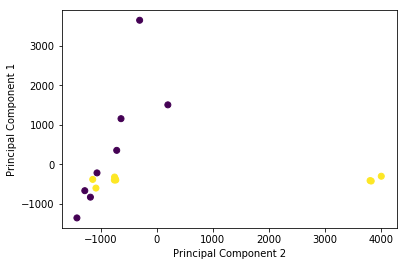

In [15]:
colors = otu_phenotype.Phenotype.apply(
    lambda Phenotype: 
    {"T": 0, 
     "TF": 1, }[Phenotype])

plt.scatter(principal_components[:, 0], principal_components[:,1], c=colors)
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 1")
plt.

In [8]:
principal_components

array([[ 3826.03980422,  -421.01854535],
       [ 3805.82721267,  -410.33559496],
       [ 4005.81268145,  -299.81582005],
       [-1184.61443952,  -828.50192737],
       [-1425.48419459, -1352.8868594 ],
       [-1086.1808997 ,  -598.92771528],
       [-1284.841621  ,  -664.9834902 ],
       [-1067.09863752,  -215.77546443],
       [-1143.22735779,  -380.14369287],
       [ -306.2818899 ,  3640.02743663],
       [  197.15916978,  1503.23011668],
       [ -638.6441019 ,  1153.78302682],
       [ -740.52530206,  -365.98582601],
       [ -753.53106317,  -320.48392848],
       [ -757.32751621,  -396.39535778],
       [ -731.75142738,  -395.36646373],
       [ -715.3304174 ,   353.58010578]])